In [1]:
from sklearn.datasets import load_digits

In [2]:
import matplotlib.pyplot as plt

In [3]:
digits = load_digits()

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
digits.images.shape

(1797, 8, 8)

In [9]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
images = digits.images
labels = digits.target

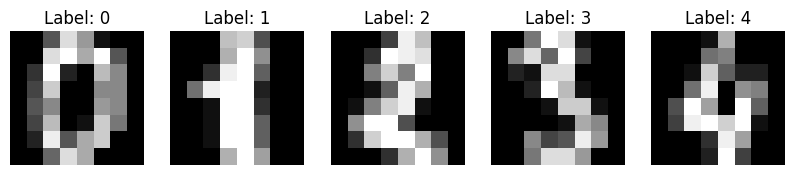

In [15]:
fig, axes = plt.subplots(1,5,figsize=(10,3))
for i in range(5):
    ax=axes[i]
    ax.imshow(images[i],cmap="gray")
    ax.set_title(f"Label: {labels[i]}")
    ax.axis('off')

plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

In [31]:
LR=LogisticRegression(max_iter=100000)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
images=images.reshape((len(images),-1))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=42)

In [21]:
X_train.shape

(1347, 64)

In [22]:
y_train.shape

(1347,)

In [23]:
y_test.shape

(450,)

In [32]:
LR.fit(X_train,y_train)

LogisticRegression(max_iter=100000)

In [33]:
y_pred=LR.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [34]:
score = accuracy_score(y_test,y_pred)

In [35]:
score

0.9733333333333334

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.97      0.97      0.97        37
           2       0.97      0.97      0.97        38
           3       0.96      0.96      0.96        46
           4       1.00      0.98      0.99        55
           5       0.95      0.97      0.96        59
           6       0.98      0.98      0.98        45
           7       1.00      0.98      0.99        41
           8       0.95      0.97      0.96        38
           9       0.96      0.96      0.96        48

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [37]:
print(confusion_matrix(y_test,y_pred))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 36  1  0  0  0  0  0  0  0]
 [ 0  0 37  1  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  0  1  0]
 [ 0  1  0  0 54  0  0  0  0  0]
 [ 0  0  0  0  0 57  1  0  0  1]
 [ 0  0  0  0  0  1 44  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  1]
 [ 0  0  0  0  0  1  0  0 37  0]
 [ 0  0  0  1  0  0  0  0  1 46]]


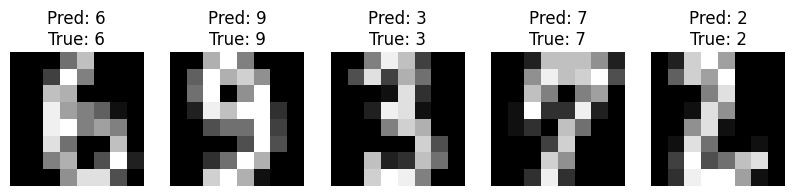

In [38]:
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Pred: {y_pred[i]}\nTrue: {y_test[i]}')
    ax.axis('off')

plt.show()

In [39]:
import numpy as np

In [42]:
misclassified_indices = np.where(y_test!=y_pred)[0]

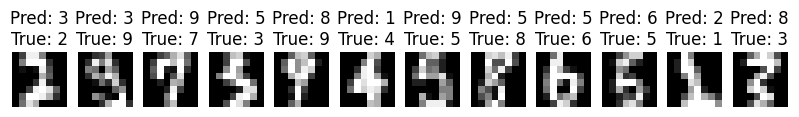

In [43]:
fig, axes = plt.subplots(1, len(misclassified_indices), figsize=(10, 3))
for i, index in enumerate(misclassified_indices):
    ax = axes[i]
    ax.imshow(X_test[index].reshape(8, 8), cmap='gray')
    ax.set_title(f'Pred: {y_pred[index]}\nTrue: {y_test[index]}')
    ax.axis('off')
plt.show()
